In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn import tree
from  sklearn.tree  import  DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('C:/Program Files/Python37/1/CSV/stepik/training_mush.csv')

In [3]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [35]:
X = df.drop(['class'], axis=1)
y = df['class']

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)
Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10
max_depth: от 1 до 12 с шагом 2
min_samples_leaf: от 1 до 7
min_samples_split: от 2 до 9 с шагом 2
Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

In [25]:
rf = RandomForestClassifier(random_state=0)

In [52]:
params = {
    'n_estimators':range(10,51,10),
'max_depth':range(1,12,2),
'min_samples_leaf':range(1,8),
'min_samples_split':range(2,10,2)
}

In [53]:
grid_search_cv_rf = GridSearchCV(rf, params, cv=3)

In [54]:
grid_search_cv_rf.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [63]:
x = grid_search_cv_rf.best_estimator_
x

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [55]:
grid_search_cv_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [64]:
x.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

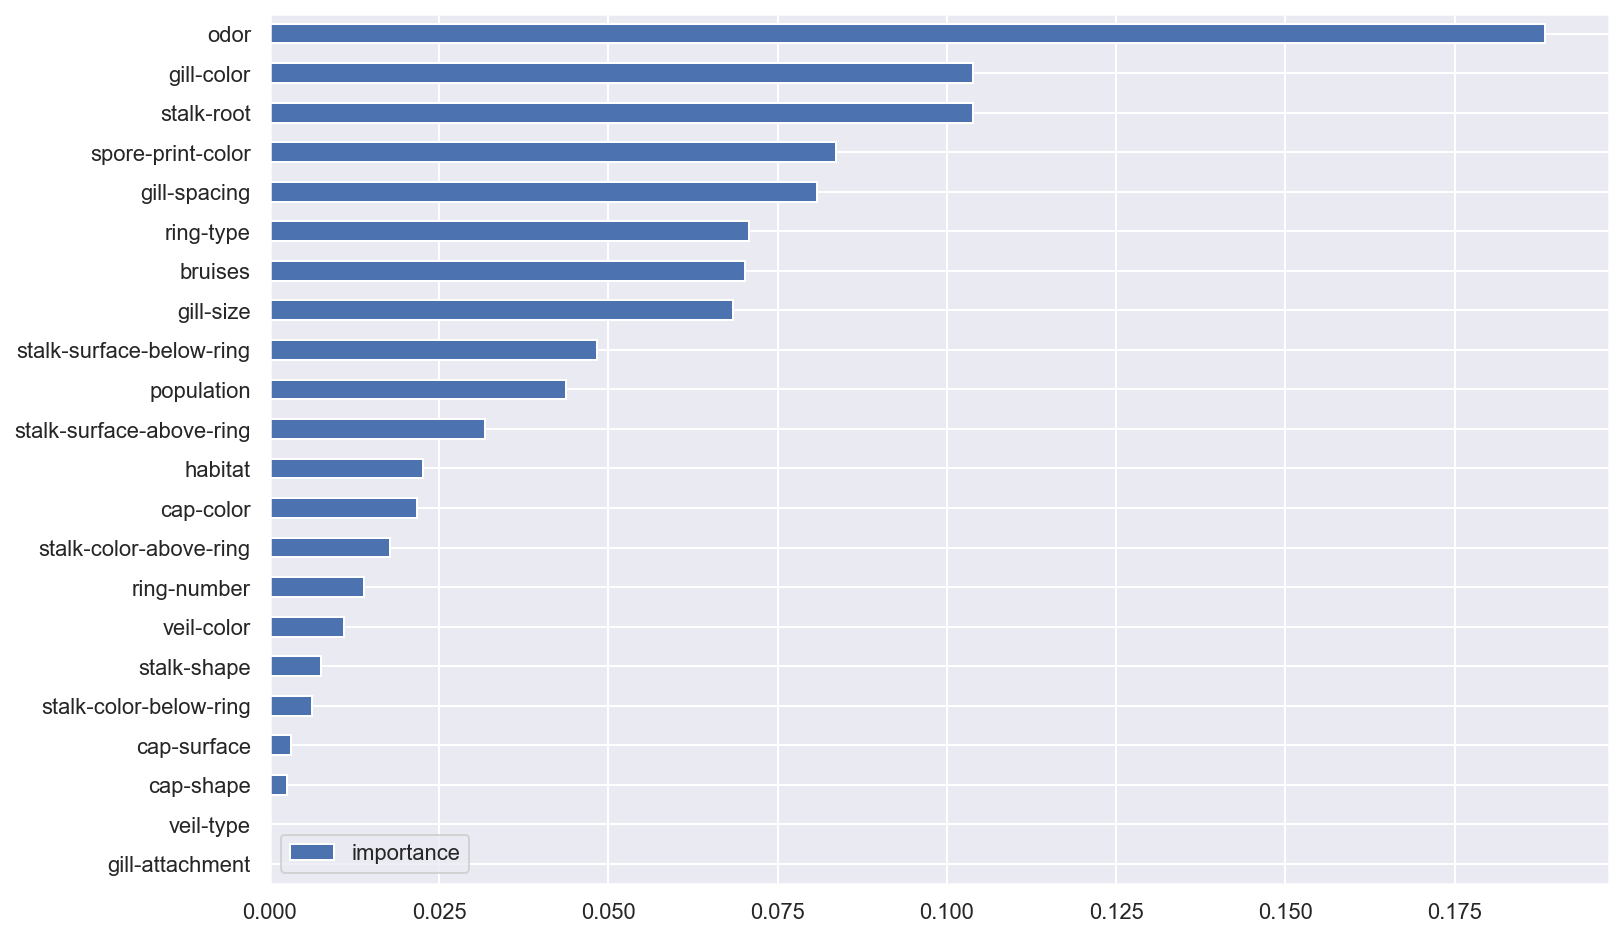

In [66]:
imp = pd.DataFrame(x.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [67]:
df2 = pd.read_csv('C:/Program Files/Python37/1/CSV/stepik/testing_mush.csv')


In [69]:
x.predict(df2).sum()

976

In [74]:
y_pred = x.predict(df2)

In [79]:
y_test = pd.read_csv('C:/Program Files/Python37/1/CSV/stepik/testing_y_mush.csv')

In [72]:
x.score(df2, otvet)

1.0

In [80]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[1055,    0],
       [   0,  976]], dtype=int64)

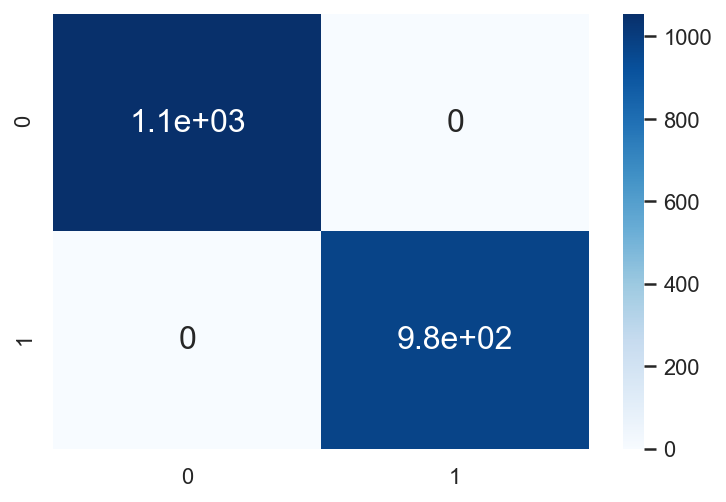

In [82]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,annot_kws={"size": 16}, cmap="Blues")